# Imbalance Classification

Imbalance classification adalah pemodelan klasifikasi ketika distribusi kelas timpang. Rasio antara kelas negatif dan kelas positif setidaknya 2:1 atau 66%:33%. Ada juga kasus-kasus ketika rationya bisa mencapai 90%:10%, 95%:5%, 99%:1% dan sebagainya.   

Ketika distribusi kelas pada data kita timpang, model yang dibangun akan memiliki performa yang buruk terutama untuk memprediksi kelas minoritas. Model klasifikasi akan cenderung mengabaikan kelas minoritas sehingga dapat terjadi masalah seperti berikut ini :  
> Pada fraud detection, katakanlah kita punya 10000 baris data, 100 di antaranya adalah data fraud, hasil prediksi dari model klasifikasi yang dibuat semuanya non-fraud dan tidak ada satupun yang fraud padahal justru kita ingin mendeteksi kasus fraud sebanyak mungkin

## Some Solution: Data:  
- Data
>- Collect more data
>- Feature Engineering
- Resampling: menyiasati data kita agar memiliki distribusi kelas yang lebih seimbang 
>- Undersampling : membuang sejumlah amatan dari kelas mayoritas secara acak  
>- Oversampling : menduplikasi secara acak berulang-ulang kelas minoritas hingga distribusi kelas menjadi lebih seimbang
>- CNN, NCR, Near Miss (undersampling technic)
>- SMOTE (oversampling)  

<center> <img src='sampling.png'> 

- Algorithm Based : 
>- Penalized method: use “class_weight” arguments in some scikit learn estimator (logistic regression, decision tree, random forest,support vector machine)
>- Use certain algorithm


# Data : Feature Engineering

Table Of Contents
- Data
- EDA
- Model 1
- Model 2

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [3]:
wine = pd.read_csv('white_wine.csv')

In [4]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


> ## EDA

We will be doing some EDA to check the target variabel distribution. The target variabel distribution is  
1. (+) a good quality wine : quality > 6 (18.9%)  
1. (-) a bad quality wine : quality <= 6 (81.1%)  

You will find that the distribution is imbalanced with 18.9 % positive class and 81.1 % negative class. The minority class is the good quality one, we migh more interest to detect a wine with good quality than the common one.

In [7]:
wine['alcohol'].fillna(wine['alcohol'].mean(),inplace=True)
wine['label'] =np.where(wine['quality']>6,1,0)
wine['label'].value_counts()/wine.shape[0]*100

0    81.153846
1    18.846154
Name: label, dtype: float64

We will develope the model only using two features alcohol and density. Using the scatterplot you can see how those feature can differentiate the wine quality. Generally, wine with good quality has high alcohol and high density.



Text(0, 0.5, 'density')

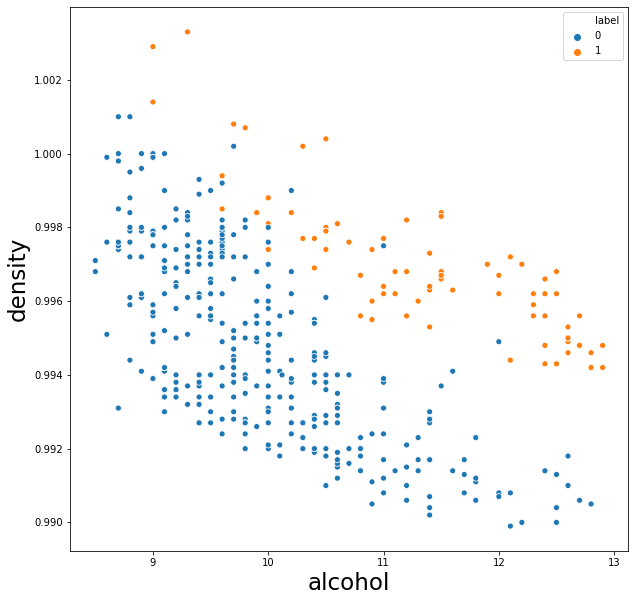

In [8]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='alcohol',y='density', data=wine,hue='label')
plt.xlabel('alcohol', fontsize=23)
plt.ylabel('density',fontsize=23)

> ## Data Splitting

In [9]:
X = wine[['density','alcohol']]
y = wine['label']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state = 2020)

> ## MODEL 1 : without polynomial

In [11]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [13]:
y_pred=logreg.predict(X_test)
print('preformance \n', classification_report(y_test,y_pred))

preformance 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       106
           1       0.69      0.38      0.49        24

    accuracy                           0.85       130
   macro avg       0.78      0.67      0.70       130
weighted avg       0.84      0.85      0.84       130



From illustration abovel, you can see the performance of the machine learning model. Let's say our concern is to these three metrics:
* precision (+) : 0.69
* recall (+) : 0.38
* f1-score (+) : 0.49

<br>
next, we will do the modeling process with adding polynomial features and see the changes.

> ## MODEL 2 : with polynomial

In [16]:
poly=PolynomialFeatures(degree=3, interaction_only= False, include_bias=False)
poly.fit(X_train)
X_train_poly=poly.transform(X_train)
X_test_poly=poly.transform(X_test)

In [19]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train_poly,y_train)

LogisticRegression(max_iter=1000)

In [20]:
y_pred = logreg.predict(X_test_poly)
print('performance \n',classification_report(y_test,y_pred))

performance 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0.95      0.88      0.91        24

    accuracy                           0.97       130
   macro avg       0.96      0.93      0.95       130
weighted avg       0.97      0.97      0.97       130



From illustration abovel, you can see the performance improvement of the machine learning model. The changes of the three metrics:  
* precision (+) : from 0.69 to 0.95
* recall (+) : from 0.38 to 0.88
* f1-score (+) : from 0.49 to 0.91

> # Resampling Method : Non Performing Loan

To use some balancing technique you will need to install imblearn library.

In [2]:
# !pip install imblearn

In [21]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, f1_score
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

Dataset used in this illustration is bankloan.csv. with :  
* target : defaut
* features : employ, debtinc, creddebt, othdebt

In [28]:
bankloan = pd.read_csv('bankloan.csv')

In [29]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [30]:
X = bankloan[fitur]
y = bankloan[target]

> ## EDA

In [31]:
bankloan['default'].value_counts()/bankloan.shape[0]*100

0    73.857143
1    26.142857
Name: default, dtype: float64

This can be seen as imbalance classification problem because the target variabel distribution is imbalanced:
1. (+) default (26.1%)
1. (-) non-default (73.9%)

> ## Data Splitting

Data splitting scenario is train 60%, validation 20%, test 20%.

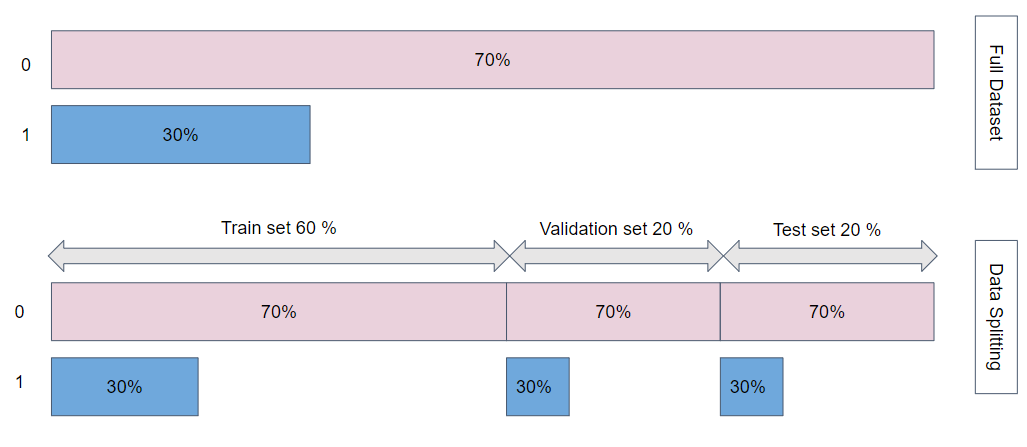

In [32]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, 
    y, 
    stratify = y,
    test_size = 0.2, 
    random_state = 1899)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val, 
    stratify = y_train_val,
    test_size = 0.25, 
    random_state = 1899)

In the modeling process we will try some method and choose the best method based on f1 score. Those methods are :
* logistic regression without any treatment
* logistic regression that otimized by the threshold
* logistic regression with random undersampling
* Penalized logistic regression

> ## No Treatment

scenario :
* metrics : f1-score
* benchmark
* threshold optimization

BENCHMARK

In [33]:
model = LogisticRegression()
model.fit(X_train_val, y_train_val)

LogisticRegression()

In [34]:
y_pred = model.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       103
           1       0.68      0.41      0.51        37

    accuracy                           0.79       140
   macro avg       0.75      0.67      0.69       140
weighted avg       0.78      0.79      0.77       140



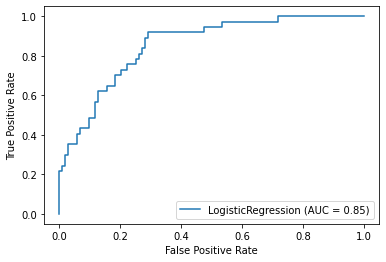

In [ ]:
plot_roc_curve(model, X_test, y_test)

THRESHOLD OPTIMIZATION

In [40]:
model.fit(X_train,y_train)

th_value=[i/100 for i in range (20,60)]
score= 0
score_list=[]

for i in th_value:
    y_prob = model.predict_proba(X_val)[:,1]
    y_pred=np.where(y_prob>i,1,0)
    score_temp=f1_score(y_val,y_pred)
    score_list.append(score_temp)

    if score_temp>score:
        score=score_temp

        best_score=score
        best_th=i

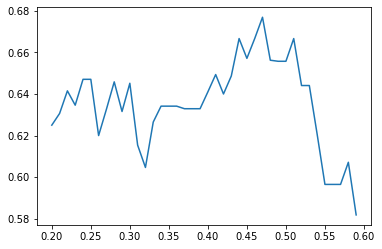

In [41]:
sns.lineplot(th_value, score_list)

In [42]:
print('best threshold', best_th)
print('best score', best_score)

best threshold 0.47
best score 0.676923076923077


In [43]:
model.fit(X_train_val,y_train_val)
y_prob=model.predict_proba(X_test)[:,1]
y_pred=np.where(y_prob>best_th,1,0)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       103
           1       0.62      0.43      0.51        37

    accuracy                           0.78       140
   macro avg       0.72      0.67      0.68       140
weighted avg       0.76      0.78      0.76       140



> ## Resampling : Undersampling

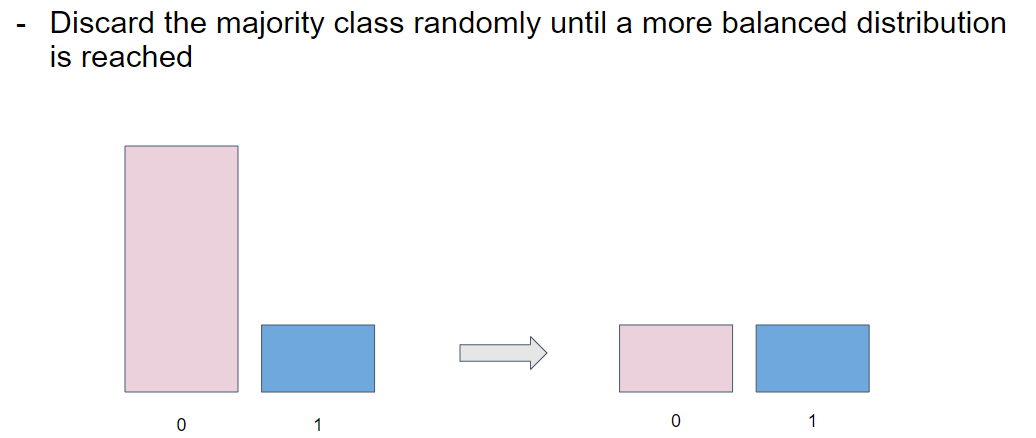

In [45]:
rus=RandomUnderSampler()
X_under, y_under =rus.fit_resample(X_train_val,y_train_val) #undersampling train and val

other method you can try:
* RandomOverSampler()
* NearMiss()
* or Oversampling with SMOTE

In [46]:
model_under=LogisticRegression()
model_under.fit(X_under,y_under)
y_pred=model_under.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81       103
           1       0.52      0.89      0.66        37

    accuracy                           0.76       140
   macro avg       0.74      0.80      0.74       140
weighted avg       0.84      0.76      0.77       140



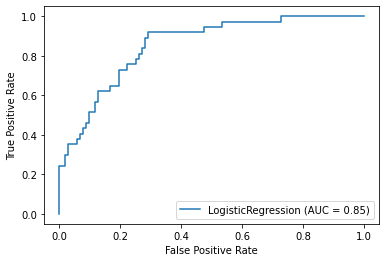

In [47]:
plot_roc_curve(model_under, X_test, y_test)

> ## Penalized

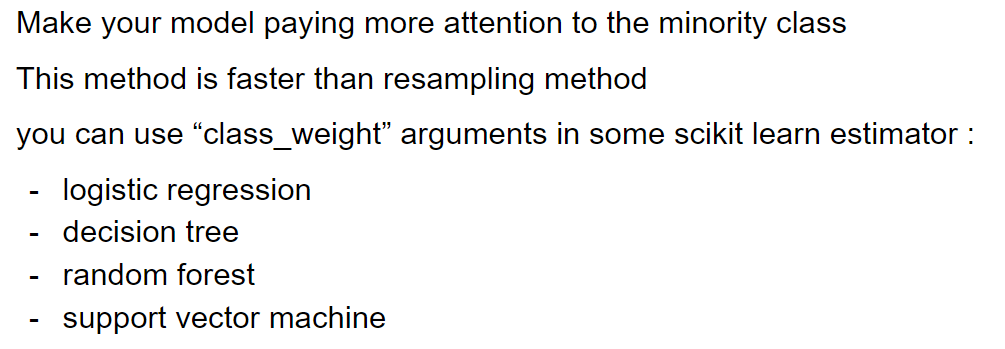

In [49]:
model_balanced= LogisticRegression(class_weight='balanced') #penalized 'balanced'
model_balanced.fit(X_train_val,y_train_val)
y_pred=model_balanced.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       103
           1       0.53      0.89      0.67        37

    accuracy                           0.76       140
   macro avg       0.74      0.81      0.74       140
weighted avg       0.84      0.76      0.78       140



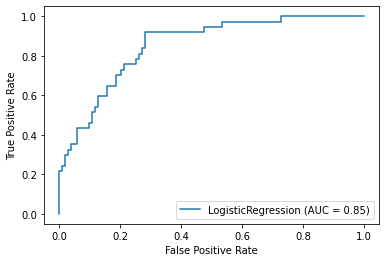

In [50]:
plot_roc_curve(model_balanced, X_test, y_test)

> ## Summary

In [51]:
f1_no_tr = f1_score(y_test,model.predict(X_test))

y_prob_th = model.predict_proba(X_test)[:,1]
f1_no_tr_th = f1_score(y_test,np.where(y_prob_th > best_th,1,0)) #ubah threshold di sini

f1_under = f1_score(y_test,model_under.predict(X_test))
f1_model = f1_score(y_test,model_balanced.predict(X_test))

In [52]:
score_list = [f1_no_tr, f1_no_tr_th, f1_under,f1_model] 
model_names = ['default','threshold optimization','random undersampling','algo based']
df_summary = pd.DataFrame({
    'method':model_names,
    'score':score_list
})
df_summary

,method,score
0,default,0.508475
1,threshold optimization,0.507937
2,random undersampling,0.660000
3,algo based,0.666667


From this summary you can see that we tried several methods to handle imbalance classification problem. The outcome is that a penalized regression can outperform another method for this case. For another case the result may differ.You can try more method as well or even optimized each method using hyperparameter tuning.

> # Combine Cross Validation with Balancing Method

In [53]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, f1_score

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [54]:
bankloan = pd.read_csv('bankloan.csv')

In [55]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [56]:
X = bankloan[fitur]
y = bankloan[target]

In [57]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, 
    y, 
    stratify = y,
    test_size = 0.2, 
    random_state = 1899)

> ## Resampling : SMOTE

SMOTE

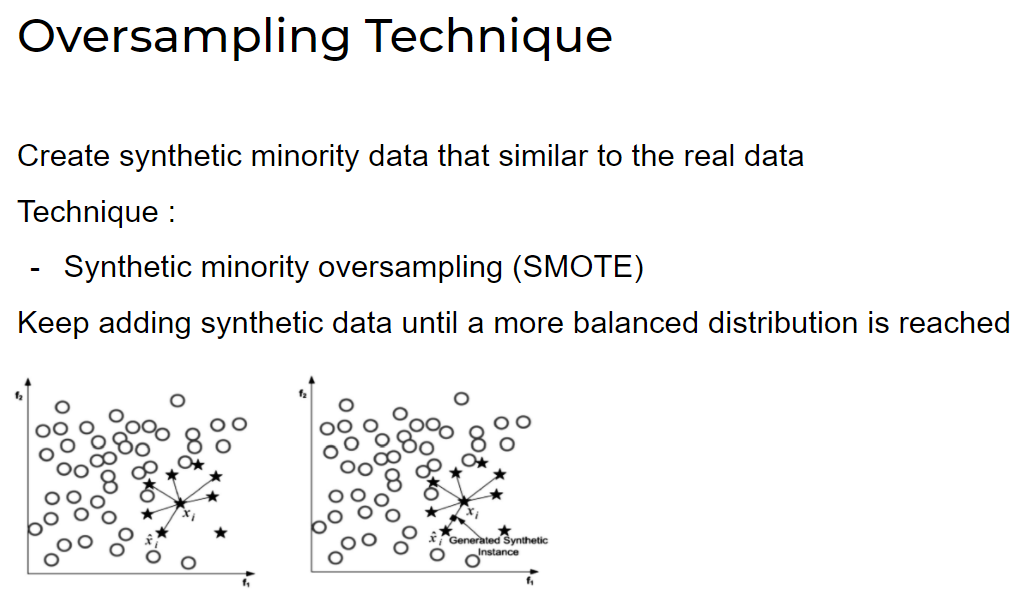

When you want to combine cross validation and any resampling method it's very recommended for you to use Pipeline because it simplyfy your code and make sure that validation set and test set is not involved in the modeling. Using pipeline will also work on hyperparameter tuning.

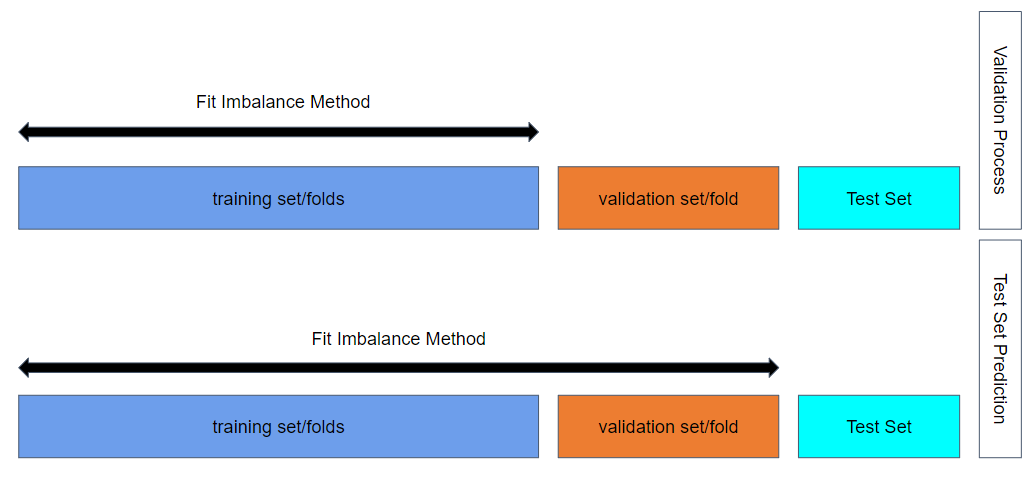

In [58]:
smote=SMOTE()
model=LogisticRegression()

estimator=Pipeline([('balancing', smote),('clf',model)])

In [59]:
skf=StratifiedKFold(n_splits=5)
model_cv= cross_val_score(estimator,X_train_val,y_train_val, cv=skf, scoring='f1')

In [61]:
print('cv score :', model_cv)
print('cv score mean :', model_cv.mean())
print('cv score std :', model_cv.std())

cv score : [0.53658537 0.59459459 0.63636364 0.74193548 0.52173913]
cv score mean : 0.606243642223528
cv score std : 0.07930760143493247


> ## Penalized

You will not need pipeline to apply penalized method and it's also faster.

In [63]:
model=LogisticRegression(class_weight='balanced')
skf=StratifiedKFold(n_splits=5)
model_cv=(cross_val_score(model,X_train_val,y_train_val, cv=skf, scoring='f1'))

In [65]:
print('cv score :', model_cv)
print('cv score mean :', model_cv.mean())
print('cv score std :', model_cv.std())

cv score : [0.56097561 0.60273973 0.60869565 0.76190476 0.52173913]
cv score mean : 0.6112109760593905
cv score std : 0.08162782517115562


The better model is the penalized model

# Combine Hyperparameter Tuning with Balancing Method

> ## Hyperparameter Tuning Scenario

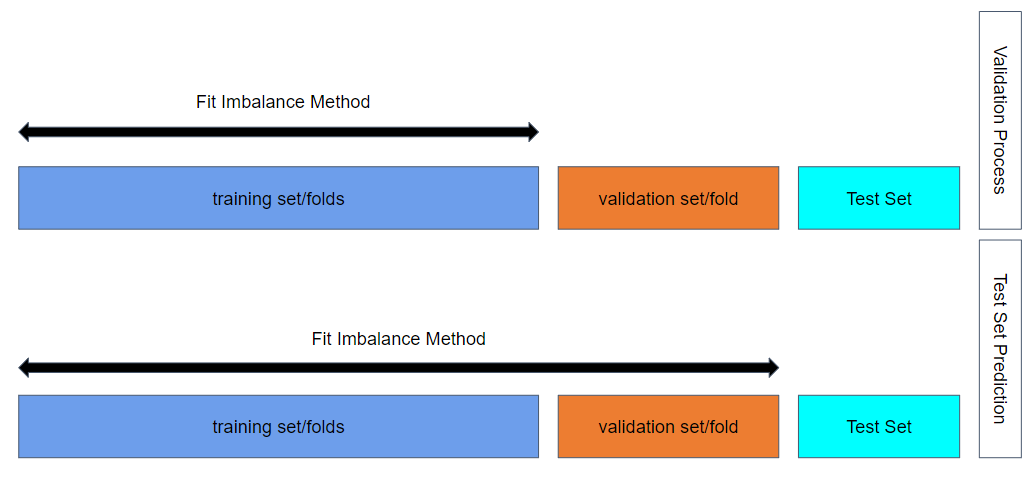

In [66]:
# make the algorithm chains
smote = SMOTE()
model =  LogisticRegression()
estimator = Pipeline([('balancing',smote),('clf',model)])

# hyperparameter space
hyperparam_space = {
    'balancing__k_neighbors':[2,5,10,15,20], #5
    'clf__C':[100, 10, 1, 0.1, 0.01, 0.001], #6
    'clf__solver':['liblinear','newton-cg']  #2
}

# stratified cross vaidation
skf = StratifiedKFold(n_splits = 5)

# hyperparameter tuning
grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skf, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)

In [67]:
grid_search.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('balancing', SMOTE()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'balancing__k_neighbors': [2, 5, 10, 15, 20],
                         'clf__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'clf__solver': ['liblinear', 'newton-cg']},
             scoring='f1')

In [68]:
print('best score',grid_search.best_score_)
print('best param',grid_search.best_params_)

best score 0.6212920990898679
best param {'balancing__k_neighbors': 15, 'clf__C': 0.01, 'clf__solver': 'liblinear'}


In [74]:
# pd.DataFrame(grid_search.cv_results_)

> ## Model Performance Before Tuning

In [70]:
smote = SMOTE()
model =  LogisticRegression()

estimator = Pipeline([('balancing',smote),('clf',model)])

estimator.fit(X_train_val,y_train_val)
y_pred = estimator.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82       103
           1       0.53      0.92      0.67        37

    accuracy                           0.76       140
   macro avg       0.75      0.81      0.74       140
weighted avg       0.85      0.76      0.78       140



> ## Model Performance After Tuning

In [73]:
grid_search.best_estimator_

Pipeline(steps=[('balancing', SMOTE(k_neighbors=15)),
                ('clf', LogisticRegression(C=0.01, solver='liblinear'))])

In [71]:
grid_search.best_estimator_.fit(X_train_val,y_train_val)
y_pred = grid_search.best_estimator_.predict(X_test)

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78       103
           1       0.48      0.86      0.62        37

    accuracy                           0.72       140
   macro avg       0.71      0.77      0.70       140
weighted avg       0.81      0.72      0.74       140



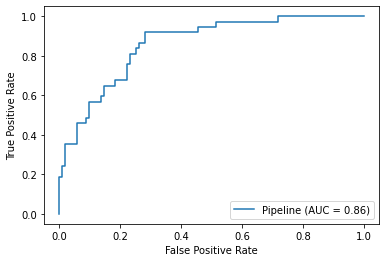

In [ ]:
plot_roc_curve(grid_search.best_estimator_, X_test, y_test)

# TASK : 

Masih menggunakan Loan dataset, kombinasikan hyperparameter tuning cv dengan metode: 
* Resampling: Undersampling
* Penalized 

email ke Brigita.gems@gmail.com  
subject: imbalance classification